# Figure 2e - Genes with over 10 significant sex-biased AS events.

The colour coding represents the number of affected tissues, sorted in decreasing order by the number of sex-biased splicing events per gene.

## **NOTE**:

We assume that you have cloned the analysis repository and have `cd` into the parent directory. Before starting with the analysis make sure you have first completed the dependencies set up by following the instructions described in the **`dependencies/README.md`** document. All paths defined in this Notebook are relative to the parent directory (repository). Please close this Notebook and start again by following the above guidelines if you have not completed the aforementioned steps.

## Loading dependencies

In [3]:
install.packages("viridis")
library(viridis)
library(ggplot2)
library(magrittr)
Sys.setenv(TAR = "/bin/tar") # for gzfile

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


## Reading the Significant Splicing Events by Tissue Results

Starting with the output from running xx script, this file that summarizes the significant splicing events by tissue is then limited to only those tissues that have greater than 10 splicing events, and then the distribution of the 5 splicing events, A3SS, A5SS, RI, SE, and MXE as a percentage of the whole are compared between the tissues.

In [139]:
df <- read.table(file ="https://github.com/adeslatt/sbas_test/releases/download/figure2_test_files/Significant_events.tsv",
                sep = "\t", quote = NULL, header = TRUE, stringsAsFactors = FALSE)
head(df)

,Tissue,ASE,Counts
,<chr>,<chr>,<int>
1,Adipose - Subcutaneous,A3SS,2
2,Adipose - Subcutaneous,A5SS,4
3,Adipose - Subcutaneous,MXE,0
4,Adipose - Subcutaneous,RI,2
5,Adipose - Subcutaneous,SE,44
6,Adipose - Visceral (Omentum),A3SS,2


Another file, which created simplifying labels is read in as well.   It is produced by XX script.

In [140]:
totals <- read.table("https://github.com/adeslatt/sbas_test/releases/download/figure2e_test_file/Totals_by_tissue_annotated.txt", 
                     sep = "\t", quote = NULL, header = TRUE, stringsAsFactors = FALSE)
head(totals)

,Tissue,Total,Label
,<chr>,<int>,<chr>
1,Adipose - Subcutaneous,52,Adipose (S)
2,Adipose - Visceral (Omentum),9,Adipose (V)
3,Adrenal Gland,147,Adrenal Glad
4,Artery - Aorta,31,Aorta
5,Artery - Coronary,6,Coronary Artery
6,Artery - Tibial,21,Tibial Artery


Using the summarizing label, where the tissues match, annotated, to summarized output, we provide the annotation label.  This will help us make the figure with cleaner labels.

In [141]:
idx <- match(df$Tissue, totals$Tissue)
df$Label <- totals$Label[idx]
df$Label <- factor(df$Label, levels = totals$Label)

dim(df)
dim(totals)
head(df)

[1] 185   4

[1] 37  3

,Tissue,ASE,Counts,Label
,<chr>,<chr>,<int>,<fct>
1,Adipose - Subcutaneous,A3SS,2,Adipose (S)
2,Adipose - Subcutaneous,A5SS,4,Adipose (S)
3,Adipose - Subcutaneous,MXE,0,Adipose (S)
4,Adipose - Subcutaneous,RI,2,Adipose (S)
5,Adipose - Subcutaneous,SE,44,Adipose (S)
6,Adipose - Visceral (Omentum),A3SS,2,Adipose (V)


Just as a check, lets ensure that the total splicing events has not been altered.

In [142]:
sum(df$Counts)
sum(totals$Total)


[1] 7222

[1] 7222

What is the distribution of the one file with annotation for the various counts of splicing events.

In [143]:
table(totals$Total)


   0    1    2    3    4    5    6    8    9   11   12   16   18   21   26   30 
   2    2    2    4    2    2    2    3    2    1    1    1    1    1    1    1 
  31   44   52   76  147  377 2072 4168 
   2    1    1    1    1    1    1    1 

One might expect greater granularity in the significant events file, that is not summarized, and as expected, the totals are lower as they are not summarized by tissue, but still broken out by each of the splicing events, which we want to preserve for this figure.

In [144]:
table(df$Counts)


   0    1    2    3    4    5    7    8   11   13   16   18   20   21   25   34 
  70   34   29   12   10    4    3    1    1    1    2    1    1    1    1    1 
  44   56   58   70  130  136  143  156  176  333  369 1541 3619 
   1    1    1    1    1    1    1    1    1    1    1    1    1 

We are limiting the figure to only those tissues that have greater than ten splicing events.

In [145]:
tissues_keep <- totals[totals$Total > 10,]
head(tissues_keep)

,Tissue,Total,Label
,<chr>,<int>,<chr>
1,Adipose - Subcutaneous,52,Adipose (S)
3,Adrenal Gland,147,Adrenal Glad
4,Artery - Aorta,31,Aorta
6,Artery - Tibial,21,Tibial Artery
9,Brain - Caudate (basal ganglia).Brain - Nucleus accumbens (basal ganglia).Brain - Putamen (basal ganglia),11,Basal Ganglia
10,Brain - Cerebellum.Brain - Cerebellar Hemisphere,18,Cerebellum


In [146]:
df_plot <- data.frame()


This is a bit of a sanity check, before the loop is run, to see that the summary label works as we would like.  What we expect to see here is the same label on the far right for each of the alternative splicing events.  Looks good!

In [149]:
df_tissue <- df[(df$Label %in% totals$Label[1]),]

In [150]:
df_tissue

,Tissue,ASE,Counts,Label
,<chr>,<chr>,<int>,<fct>
1,Adipose - Subcutaneous,A3SS,2,Adipose (S)
2,Adipose - Subcutaneous,A5SS,4,Adipose (S)
3,Adipose - Subcutaneous,MXE,0,Adipose (S)
4,Adipose - Subcutaneous,RI,2,Adipose (S)
5,Adipose - Subcutaneous,SE,44,Adipose (S)


In [151]:
total_df_counts <- sum(df$Counts)
total_df_counts

[1] 7222

Another check, before we go for the loop, to make sure all is clean -- probably not necessary to break out each of the alternative splicing events separately, but it keeps ones mind clear on these events.

In [152]:
length(totals$Label)
length(tissues_keep$Label)
tissue_splicing_events = sum(df$Counts[(df$ASE=='A3SS' | 
               df$ASE=='A5SS' |
               df$ASE=='RI'   |
               df$ASE=='MXE'  |
               df$ASE=='SE'   ) & df$Label == tissues_keep$Label[1]])

tissue_splicing_events
all_splicing_events = sum(tissues_keep$Total)
all_splicing_events
percentage <- tissue_splicing_events/all_splicing_events*100
percentage

[1] 37

[1] 16

[1] 52

[1] 7132

[1] 0.7291082

In [153]:
total_splicing_events = sum (tissues_keep$Total)
total_splicing_events


Now, we create a new data frame (df_plot), which contains the label, as well as the percentages.   This will be our data for our plot.

In [176]:
df_plot <- data.frame()
for (i in 1:length(tissues_keep$Label)) {
    tissue_splicing_events = sum(df$Counts[(df$ASE=='A3SS' | 
                                          df$ASE=='A5SS' |
                                          df$ASE=='RI'   |
                                          df$ASE=='MXE'  |
                                          df$ASE=='SE'   ) 
                                        & df$Label == tissues_keep$Label[i]])
    
    df_tissue      <- df[(df$Label %in% tissues_keep$Label[i]),]
    df_tissue$Perc <- (df_tissue$Counts / tissue_splicing_events) * 100
    if (i == 1)
        df_plot <- df_tissue
    else
        df_plot <- rbind(df_plot, df_tissue)
}  
dim(df_plot)
head(df_plot)

[1] 80  5

,Tissue,ASE,Counts,Label,Perc
,<chr>,<chr>,<int>,<fct>,<dbl>
1,Adipose - Subcutaneous,A3SS,2,Adipose (S),3.846154
2,Adipose - Subcutaneous,A5SS,4,Adipose (S),7.692308
3,Adipose - Subcutaneous,MXE,0,Adipose (S),0.000000
4,Adipose - Subcutaneous,RI,2,Adipose (S),3.846154
5,Adipose - Subcutaneous,SE,44,Adipose (S),84.615385
11,Adrenal Gland,A3SS,2,Adrenal Glad,1.360544


Now, we make our plot, it will be collored by the proportion of each splicing event for each of the tissues that have greater than 10 splicing events.   

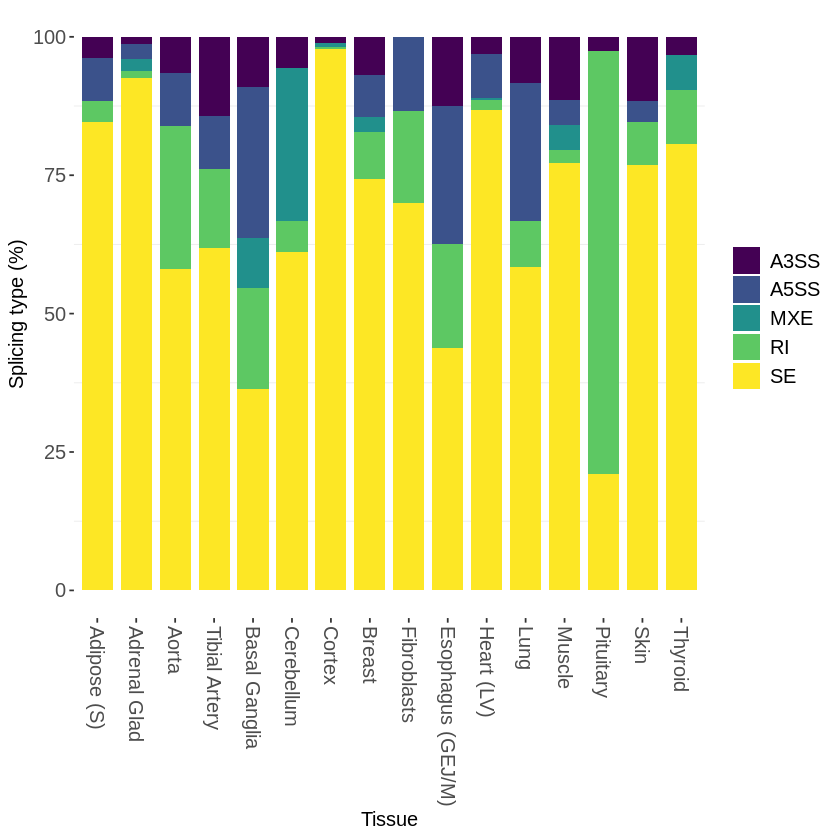

In [177]:
p<-ggplot(df_plot, 
       aes(x=Label, y=Perc, fill = ASE, by = Tissue)) +
  geom_bar(stat = "identity", width = 0.8) +
  theme_bw() +
  theme(axis.text.x = element_text(size=12, angle = 270, hjust = 0.0, vjust = 0.5),
        #axis.ticks.x = element_blank(),
        axis.text.y = element_text(size=12),
        axis.title.x = element_text(face="plain", colour="black", size=12),
        axis.title.y = element_text(face="plain", colour="black", size=12),
        legend.title=element_blank(),
        panel.background=element_blank(),
        panel.border=element_blank(),
        panel.grid.major=element_blank(),
        legend.text = element_text(face="plain", colour="black", size=12)
  ) +
  #scale_fill_brewer(palette="Dark2") +
  #scale_fill_manual(values = palette_npg) +
  scale_fill_viridis(discrete=TRUE) +
  ylab("Splicing type (%)") +
  xlab("Tissue")
p

In [178]:
ggsave(file = "../pdf/Figure2e.pdf", plot = p)

Saving 6.67 x 6.67 in image


## ... 
more of the above sequence

## Metadata

For replicability and reproducibility purposes, we also print the following metadata:

1. Checksums of **'artefacts'**, files generated during the analysis and stored in the folder directory **`data`**
2. List of environment metadata, dependencies, versions of libraries using `utils::sessionInfo()` and [`devtools::session_info()`](https://devtools.r-lib.org/reference/session_info.html)

### 1. Checksums with the sha256 algorithm

In [137]:
figure_id   = "Figure2e"

message("Generating sha256 checksums of the artefacts in the `..data/` directory .. ")
system(paste0("cd ../data/ && sha256sum * > ../metadata/", figure_id, "_sha256sums.txt"), intern = TRUE)
message("Done!\n")

data.table::fread(paste0("../metadata/", figure_id, "_sha256sums.txt"), header = FALSE, col.names = c("sha256sum", "file"))

Generating sha256 checksums of the artefacts in the `..data/` directory .. 


character(0)

Done!



sha256sum,file
<chr>,<chr>
5146c849c9354129590c59da5e6040a074523b4827d0975e3f5fa43737af7e9a,README.md


### 2. Libraries metadata

In [138]:
figure_id   = "Figure2e"

dev_session_info   <- devtools::session_info()
utils_session_info <- utils::sessionInfo()

message("Saving `devtools::session_info()` objects in ../metadata/devtools_session_info.rds  ..")
saveRDS(dev_session_info, file = paste0("../metadata/", figure_id, "_devtools_session_info.rds"))
message("Done!\n")

message("Saving `utils::sessionInfo()` objects in ../metadata/utils_session_info.rds  ..")
saveRDS(utils_session_info, file = paste0("../metadata/", figure_id ,"_utils_info.rds"))
message("Done!\n")

dev_session_info$platform
dev_session_info$packages[dev_session_info$packages$attached==TRUE, ]

Saving `devtools::session_info()` objects in ../metadata/devtools_session_info.rds  ..
Done!

Saving `utils::sessionInfo()` objects in ../metadata/utils_session_info.rds  ..
Done!



 setting  value                       
 version  R version 3.6.1 (2019-07-05)
 os       Ubuntu 18.04.3 LTS          
 system   x86_64, linux-gnu           
 ui       X11                         
 language en_US.UTF-8                 
 collate  en_US.UTF-8                 
 ctype    en_US.UTF-8                 
 tz       Etc/UTC                     
 date     2020-02-28                  

,package,ondiskversion,loadedversion,path,loadedpath,attached,is_base,date,source,md5ok,library
,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<lgl>,<fct>
ggplot2,ggplot2,3.2.1,3.2.1,/opt/conda/lib/R/library/ggplot2,/opt/conda/lib/R/library/ggplot2,TRUE,FALSE,2019-08-10,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
magrittr,magrittr,1.5,1.5,/opt/conda/lib/R/library/magrittr,/opt/conda/lib/R/library/magrittr,TRUE,FALSE,2014-11-22,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
viridis,viridis,0.5.1,0.5.1,/opt/conda/lib/R/library/viridis,/opt/conda/lib/R/library/viridis,TRUE,FALSE,2018-03-29,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
viridisLite,viridisLite,0.3.0,0.3.0,/opt/conda/lib/R/library/viridisLite,/opt/conda/lib/R/library/viridisLite,TRUE,FALSE,2018-02-01,CRAN (R 3.6.1),NA,/opt/conda/lib/R/library
